# Data Exploration Exercises


## 1. Spam Data

### a. Load the spam data set.

In [13]:
import pandas as pd
from prepare import basic_clean, lemmatize, remove_stopwords
import matplotlib.pyplot as plt

# acquire data from spam_db
from env import user, password, host

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")

In [2]:
df.shape

(5572, 2)

In [4]:
df.head

<bound method NDFrame.head of      label                                               text
id                                                           
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

### b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [3]:
# initial value counts
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [5]:
# combine cleaning function
def clean(text):
    return remove_stopwords(lemmatize(basic_clean(text)))

In [6]:
# clean text in spam data
df.text = df.text.apply(clean)

In [7]:
# check cleaned text
df.text.head()

id
0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4             nah dont think go usf life around though
Name: text, dtype: object

In [8]:
# categorize text
all_text = ' '.join(df.text)
spam_text = ' '.join(df[df.label == 'spam'].text)
ham_text = ' '.join(df[df.label == 'ham'].text)
all_text = clean(all_text)
spam_text = clean(spam_text)
ham_text = clean(ham_text)

In [9]:
# aggregate on word, check frequency for each word
pd.Series(all_text.split()).value_counts()

u           1183
call         600
2            478
im           462
get          397
            ... 
basket         1
dane           1
corrct         1
santha         1
bitching       1
Length: 8886, dtype: int64

In [10]:
# store value count into variable
ham_freq = pd.Series(ham_text.split()).value_counts()
spam_freq = pd.Series(spam_text.split()).value_counts()
all_freq = pd.Series(all_text.split()).value_counts()

In [11]:
# store word's frequency into dataframe
word_counts = pd.concat([all_freq, spam_freq, ham_freq], sort=True, axis=1)
word_counts.columns = ['all', 'spam', 'ham']
word_counts = word_counts.fillna(0).apply(lambda s: s.astype(int))

In [12]:
# sort dataframe by frequency
word_counts.sort_values(by='all', ascending=False)

,all,spam,ham
u,1183,155,1028
call,600,359,241
2,478,173,305
im,462,13,449
get,397,83,314
...,...,...,...
hari,1,0,1
hardest,1,0,1
harder,1,0,1
happiest,1,0,1


<AxesSubplot:title={'center':'Most Frequenly Occured Words'}>

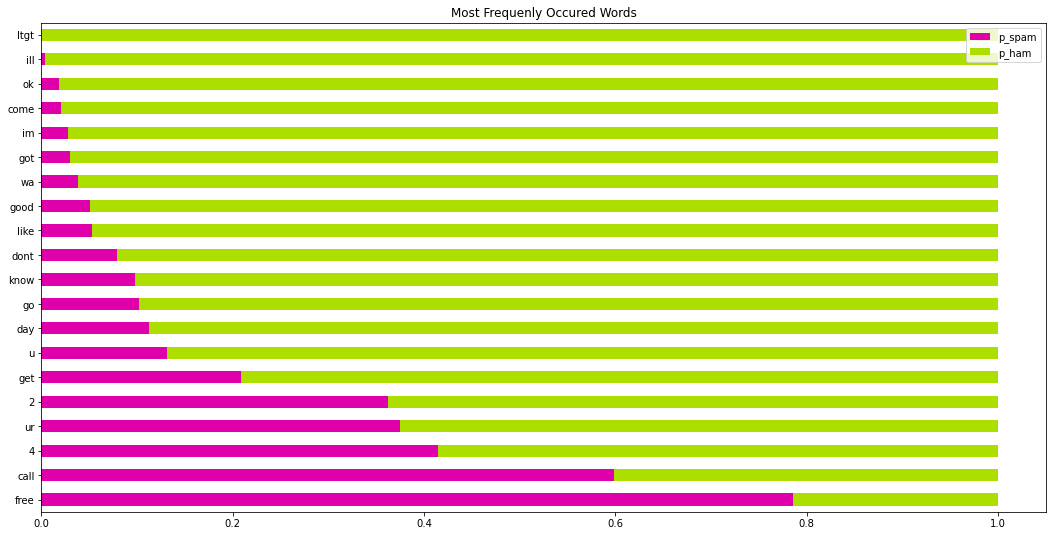

In [19]:
# visualizing word frequency
word_counts.assign(p_spam=word_counts.spam / word_counts['all'],p_ham=word_counts.ham / word_counts['all'])\
    .sort_values(by='all')\
    .tail(20)\
    [['p_spam', 'p_ham']]\
    .sort_values(by='p_ham')\
    .plot.barh(stacked=True, figsize = (18,9), title = 'Most Frequenly Occured Words', color = ['#DF00AC', '#ACDF00'])

### c. Is there any overlap in the bigrams for the spam data and the ham data?


### d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

## 2. Explore the blog articles using the techniques discussed in the exploration lesson./

## 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the `category` variable when exploring.